In [1]:
from skimage import io

from skimage.filters import roberts, scharr, prewitt, sobel, hessian, frangi, sato, threshold_yen
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.exposure import equalize_hist
from skimage.measure import label, regionprops, regionprops_table
from skimage.morphology import erosion, dilation
from skimage.feature import greycomatrix, greycoprops

from matplotlib import pyplot as plt

import os
import numpy as np
import pandas as pd

from skimage.filters import gaussian

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

import os
import glob
import math

import statistics
from scipy.stats import mannwhitneyu, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix 
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [3]:
def lines(path, store, threshold=0.02):
    length = len(os.listdir(path))
    i=0 
    for image_path in os.listdir(path):
        if not image_path.startswith('.'):
            i = i+1
            print(f"{i} of {length-1}") #path: {path}, type: {store}")
            input_path = os.path.join(path, image_path)
            img = io.imread(input_path, as_gray=True)
            img = resize(img, (512, 256))
            imagewt = sato(img, mode='constant')
            number = np.sum(imagewt>threshold)
            name = image_path
            store[name] = number
            
            
def pvalues(a, b, c):
    F, p = f_oneway(a, b, c)
    print('Statistics=%.3f, p=%.3f' % (F, p))
    scores = a + b + c
    group = []
    for i in range(len(a)):
        group.append('WT')
    for i in range(len(b)):
        group.append('Het')
    for i in range(len(c)):
        group.append('Homo')
    df = pd.DataFrame({'score': scores, 'group': group})
    tukey = pairwise_tukeyhsd(endog=df['score'],
                             groups=df['group'],
                             alpha=0.05)
    print(tukey)  

                
def pvalues4(a, b, c, d):
    F, p = f_oneway(a, b, c, d)
    print('Statistics=%.3f, p=%.3f' % (F, p))
    scores = a + b + c + d
    group = []
    for i in range(len(a)):
        group.append('absent')
    for i in range(len(b)):
        group.append('mild')
    for i in range(len(c)):
        group.append('moderate')
    for i in range(len(d)):
        group.append('severe')
    df = pd.DataFrame({'score': scores, 'group': group})
    tukey = pairwise_tukeyhsd(endog=df['score'],
                             groups=df['group'],
                             alpha=0.05)
    print(tukey)  

def plotbox(a, xa, ya, ylabel, alpha=0.5, s=3.5):
    sns.set(style="white")
    boxplot_width = 0.1  
    swarmplot_offset = -0.5 
    xlim_offset = -1  
    colours = ['lightskyblue','coral', 'dimgrey']
    ax = sns.swarmplot(x=xa, y=ya, data=a, palette=colours, alpha=alpha, s=s)
    path_collections = [child for child in ax.get_children() 
                        if isinstance(child,matplotlib.collections.PathCollection)] 
    for path_collection in path_collections: 
        x,y = np.array(path_collection.get_offsets()).T 
        xnew = x + swarmplot_offset
        offsets = list(zip(xnew,y)) 
        path_collection.set_offsets(offsets)
    sns.boxplot(x=xa, y=ya, data=a, width=boxplot_width, ax=ax, palette=colours) 
    def change_width(ax, new_value):
        for patch in ax.patches:
            current_width = patch.get_width()
            diff = current_width - new_value
            # change patch width
            patch.set_width(new_value)
            # re-center patch
            patch.set_x(patch.get_x() + diff * .5)
    change_width(ax,.25)
    plt.xticks([0, 1.1, 2.3], ['Wild Type', 'Heterozygous', 'Homozygous or \ncompound het'])
    ax.set_xticklabels(ax.get_xticklabels(), ha="right")  
    ax.set_xlim(xlim_offset,ax.get_xlim()[1]) 
    ax.set_xlabel('Filaggrin gene mutation status', fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

"""
def plotbox2(a, xa, ya, ylabel, alpha=0.5, s=3.5):
    sns.set(style="white")
    boxplot_width = 0.1  
    swarmplot_offset = -0.5 
    xlim_offset = -1  
    colours = ['lightskyblue','coral', 'dimgrey']
    ax = sns.swarmplot(x=xa, y=ya, data=a, palette=colours, alpha=alpha, s=s)
    path_collections = [child for child in ax.get_children() 
                        if isinstance(child,matplotlib.collections.PathCollection)] 
    for path_collection in path_collections: 
        x,y = np.array(path_collection.get_offsets()).T 
        xnew = x + swarmplot_offset
        offsets = list(zip(xnew,y)) 
        path_collection.set_offsets(offsets)
    sns.boxplot(x=xa, y=ya, data=a, width=boxplot_width, ax=ax, palette=colours) 
    def change_width(ax, new_value):
        for patch in ax.patches:
            current_width = patch.get_width()
            diff = current_width - new_value
            # change patch width
            patch.set_width(new_value)
            # re-center patch
            patch.set_x(patch.get_x() + diff * .5)
    change_width(ax,.25)
    #plt.xticks([0, 1.1, 2.3], ['Wild Type', 'Heterozygous', 'Homozygous or \ncompound het'])
    plt.xticks([0, 1.1, 2.3], ["Wild Type \n n=324", "Heterozygous \n n=179", "Homozygous or compound het \n n=28"])
    ax.set_xticklabels(ax.get_xticklabels(), ha="right")  
    ax.set_xlim(xlim_offset,ax.get_xlim()[1]) 
    ax.set_xlabel('Filaggrin gene mutation status', fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))


"""

def plotbox2(a, xa, ya, ylabel, alpha=0.5, s=3.5, colours=['lightskyblue','coral', 'dimgrey'], hue='flg_binary'):
    sns.set(style="white")
    boxplot_width = 0.1  
    swarmplot_offset = -0.5 
    xlim_offset = -1  
    ax = sns.swarmplot(x=xa, y=ya, data=a, palette=colours, alpha=alpha, s=s)
    path_collections = [child for child in ax.get_children() 
                        if isinstance(child,matplotlib.collections.PathCollection)] 
    for path_collection in path_collections: 
        x,y = np.array(path_collection.get_offsets()).T 
        xnew = x + swarmplot_offset
        offsets = list(zip(xnew,y)) 
        path_collection.set_offsets(offsets)
    sns.boxplot(x=xa, y=ya, data=a, width=boxplot_width, ax=ax, palette=colours) 
    def change_width(ax, new_value):
        for patch in ax.patches:
            current_width = patch.get_width()
            diff = current_width - new_value
            # change patch width
            patch.set_width(new_value)
            # re-center patch
            patch.set_x(patch.get_x() + diff * .5)
    change_width(ax,.25)
    if  not altlabel:
        plt.xticks([0, 1.1, 2.3], ['Wild Type', 'Heterozygous', 'Homozygous or \ncompound het'])
    else:
        plt.xticks([0, 1.1, 2.3], ["Wild Type \n n=324", "Heterozygous \n n=179", "Homozygous or compound het \n n=28"])
    ax.set_xticklabels(ax.get_xticklabels(), ha="right")  
    ax.set_xlim(xlim_offset,ax.get_xlim()[1]) 
    ax.set_xlabel('Filaggrin gene mutation status', fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

def plotbox3(a, xa, ya, ylabel, alpha=0.5, s=3.5, colours=['lightskyblue','coral', 'dimgrey'], hue_a='flg_binary'):
    sns.set(style="white")
    boxplot_width = 0.1  
    swarmplot_offset = -0.5 
    xlim_offset = -1  
    ax = sns.swarmplot(x=xa, y=ya, data=a, palette=colours, alpha=alpha, s=s)
    path_collections = [child for child in ax.get_children() 
                        if isinstance(child,matplotlib.collections.PathCollection)] 
    for path_collection in path_collections: 
        x,y = np.array(path_collection.get_offsets()).T 
        xnew = x + swarmplot_offset
        offsets = list(zip(xnew,y)) 
        path_collection.set_offsets(offsets)
    sns.boxplot(x=xa, y=ya, data=a, width=boxplot_width, ax=ax, palette=colours) 
    def change_width(ax, new_value):
        for patch in ax.patches:
            current_width = patch.get_width()
            diff = current_width - new_value
            # change patch width
            patch.set_width(new_value)
            # re-center patch
            patch.set_x(patch.get_x() + diff * .5)
    change_width(ax,.25)
    plt.xticks([0, 1.1, 2.3], ["Wild Type \n n=324", "Heterozygous \n n=179", "Homozygous or compound het \n n=28"])
    ax.set_xticklabels(ax.get_xticklabels(), ha="right")  
    ax.set_xlim(xlim_offset,ax.get_xlim()[1]) 
    ax.set_xlabel('Filaggrin gene mutation status', fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

    

    ###COMPARISON 0 AND 1
def addstats(result01, result12, result02, ymax):
    x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    y = a[ya].max() + (a[ya].max() * 0.05 )
    h = 2
    col = 'k'

    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)
    ###COMPARISON 1 AND 2
    x1, x2 = 1, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())

    y = a[ya].max() + (a[ya].max() * 0.1 )
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, result12, ha='center', va='bottom', color=col)

    ###COMPARISON 0 AND 1
    x1, x2 = 0, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())

    y = a[ya].max() + (a[ya].max() * 0.18 )

    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, result02, ha='center', va='bottom', color=col)
    
def countimages(path):
    i=0
    for fname in os.listdir(path):
        if not fname.startswith('.'):
            i=i+1
            #print(fname)
    print(f"Image count for {path}: {i}")
    return i



In [4]:
"""
PATHS
"""

base_dir = '/Users/L/Downloads/palmarhyperlinearity/'
base_dir_thenar = '/Users/L/Downloads/palmarhyperlinearity/thenarversionall2/'
base_dir_p = '/Users/L/Downloads/palmarhyperlinearity/palmarversionall2/'

path_thenar_wt = os.path.join(base_dir_thenar, 'wtupdated')
path_thenar_het = os.path.join(base_dir_thenar, 'het')
path_thenar_homo = os.path.join(base_dir_thenar, 'homo')

path_palm_wt = os.path.join(base_dir_p, 'wt')
path_palm_het = os.path.join(base_dir_p, 'het')
path_palm_homo = os.path.join(base_dir_p, 'homo')

countimages(path_thenar_wt) 
countimages(path_thenar_het) 
countimages(path_thenar_homo) 
 

countimages(path_palm_wt)
countimages(path_palm_het)
countimages(path_palm_homo)

print(f" total image count = {countimages(path_palm_wt) + countimages(path_palm_het) + countimages(path_palm_homo)}")


Image count for /Users/L/Downloads/palmarhyperlinearity/thenarversionall2/wtupdated: 324
Image count for /Users/L/Downloads/palmarhyperlinearity/thenarversionall2/het: 179
Image count for /Users/L/Downloads/palmarhyperlinearity/thenarversionall2/homo: 28
Image count for /Users/L/Downloads/palmarhyperlinearity/palmarversionall2/wt: 324
Image count for /Users/L/Downloads/palmarhyperlinearity/palmarversionall2/het: 179
Image count for /Users/L/Downloads/palmarhyperlinearity/palmarversionall2/homo: 28
Image count for /Users/L/Downloads/palmarhyperlinearity/palmarversionall2/wt: 324
Image count for /Users/L/Downloads/palmarhyperlinearity/palmarversionall2/het: 179
Image count for /Users/L/Downloads/palmarhyperlinearity/palmarversionall2/homo: 28
 total image count = 531


In [5]:
"""
T0.02 - score generation
"""
thres = 0.02

thenar_wt_scores= {}
thenar_het_scores= {}
thenar_homo_scores= {}

lines(path_thenar_wt, thenar_wt_scores, thres)
lines(path_thenar_het, thenar_het_scores, thres) 
lines(path_thenar_homo, thenar_homo_scores, thres)

"""
P0.02 - score generation
"""
thres=0.02

palmwtscores= {} 
palmhetscores= {}
palmhomoscores= {}

lines(path_palm_wt, palmwtscores, thres)
lines(path_palm_het, palmhetscores, thres)
lines(path_palm_homo, palmhomoscores, thres)

print("done palm 0.02")



1 of 324
2 of 324
3 of 324
4 of 324
5 of 324
6 of 324
7 of 324
8 of 324
9 of 324
10 of 324
11 of 324
12 of 324
13 of 324
14 of 324
15 of 324
16 of 324
17 of 324
18 of 324
19 of 324
20 of 324
21 of 324
22 of 324
23 of 324
24 of 324
25 of 324
26 of 324
27 of 324
28 of 324
29 of 324
30 of 324
31 of 324
32 of 324
33 of 324
34 of 324
35 of 324
36 of 324
37 of 324
38 of 324
39 of 324
40 of 324
41 of 324
42 of 324
43 of 324
44 of 324
45 of 324
46 of 324
47 of 324
48 of 324
49 of 324
50 of 324
51 of 324
52 of 324
53 of 324
54 of 324
55 of 324
56 of 324
57 of 324
58 of 324
59 of 324
60 of 324
61 of 324
62 of 324
63 of 324
64 of 324
65 of 324
66 of 324
67 of 324
68 of 324
69 of 324
70 of 324
71 of 324
72 of 324
73 of 324
74 of 324
75 of 324
76 of 324
77 of 324
78 of 324
79 of 324
80 of 324
81 of 324
82 of 324
83 of 324
84 of 324
85 of 324
86 of 324
87 of 324
88 of 324
89 of 324
90 of 324
91 of 324
92 of 324
93 of 324
94 of 324
95 of 324
96 of 324
97 of 324
98 of 324
99 of 324
100 of 324
101 of 3

251 of 324
252 of 324
253 of 324
254 of 324
255 of 324
256 of 324
257 of 324
258 of 324
259 of 324
260 of 324
261 of 324
262 of 324
263 of 324
264 of 324
265 of 324
266 of 324
267 of 324
268 of 324
269 of 324
270 of 324
271 of 324
272 of 324
273 of 324
274 of 324
275 of 324
276 of 324
277 of 324
278 of 324
279 of 324
280 of 324
281 of 324
282 of 324
283 of 324
284 of 324
285 of 324
286 of 324
287 of 324
288 of 324
289 of 324
290 of 324
291 of 324
292 of 324
293 of 324
294 of 324
295 of 324
296 of 324
297 of 324
298 of 324
299 of 324
300 of 324
301 of 324
302 of 324
303 of 324
304 of 324
305 of 324
306 of 324
307 of 324
308 of 324
309 of 324
310 of 324
311 of 324
312 of 324
313 of 324
314 of 324
315 of 324
316 of 324
317 of 324
318 of 324
319 of 324
320 of 324
321 of 324
322 of 324
323 of 324
324 of 324
1 of 179
2 of 179
3 of 179
4 of 179
5 of 179
6 of 179
7 of 179
8 of 179
9 of 179
10 of 179
11 of 179
12 of 179
13 of 179
14 of 179
15 of 179
16 of 179
17 of 179
18 of 179
19 of 179
20 of

In [6]:
"""
T0.02 - dataframe
"""

thenarwtdf = pd.DataFrame.from_dict(thenar_wt_scores, orient="index")
thenarwtdf['ID'] = thenarwtdf.index
thenarwtdf = thenarwtdf.assign(FLGstatus = 0)

thenarhetdf = pd.DataFrame.from_dict(thenar_het_scores, orient="index")
thenarhetdf['ID'] = thenarhetdf.index
thenarhetdf = thenarhetdf.assign(FLGstatus = 1)

thenarhomodf = pd.DataFrame.from_dict(thenar_homo_scores, orient="index")
thenarhomodf['ID'] = thenarhomodf.index
thenarhomodf = thenarhomodf.assign(FLGstatus = 2)



thenarscoresalldf = pd.concat([thenarwtdf, thenarhetdf, thenarhomodf])
thenarscoresalldf.set_index(['ID'])
thenarscoresalldf.columns = ['Thenar scores', 'ID', 'FLG status']

thenarscoresalldf.head()

thenarscoresalldf.to_csv("thenarscoresalldf.csv")



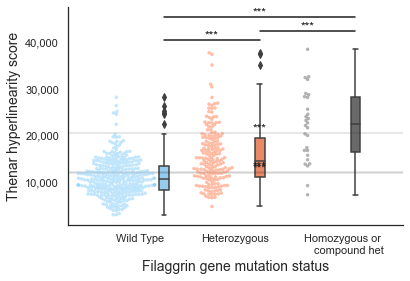

In [120]:
"""
T0.02 - figure
"""

a = pd.read_csv("thenarscoresalldf.csv")
ylab = 'Thenar hyperlinearity score'

ya="Thenar scores"
result01 = "***"
result12 = "***"
result02 = "***"

plotbox(a=a, xa="FLG status", ya=ya, ylabel=ylab, alpha=0.5, s=3.5)
#plotbox2(a=a, xa="FLG status", ya=ya, ylabel=ylab, alpha=0.5, s=3.5, altlabel=True)
ymax = a[ya].max()
addstats(result01, result12, result02, ymax)
#plt.title('Thenar dataset')

#####add in scores from other images
x1, x2 = -1, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
h = 2
col = 'k'

y = 12214
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)

y = 11855
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)

y = 20479
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)


sns.despine()
plt.show()





In [9]:
list_thenar_wt_scores = list(thenar_wt_scores.values())
list_thenar_het_scores  = list(thenar_het_scores.values())
list_thenar_homo_scores  = list(thenar_homo_scores.values())

pvalues(list_thenar_wt_scores , list_thenar_het_scores, list_thenar_homo_scores)

st_dev = statistics.pstdev(list_thenar_wt_scores)
print(statistics.mean(list_thenar_wt_scores))
print("Standard deviation of the thenar wt 0.02: " + str(st_dev))
print(" ")

print(statistics.mean(list_thenar_het_scores))
st_dev = statistics.pstdev(list_thenar_het_scores)
print("Standard deviation of the thenar -/+ 0.02: " + str(st_dev))
print(" ")

print(statistics.mean(list_thenar_homo_scores))
st_dev = statistics.pstdev(list_thenar_homo_scores)
print("Standard deviation of the thenar -/- 0.02: " + str(st_dev))

Statistics=92.159, p=0.000
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2   meandiff  p-adj   lower      upper    reject
------------------------------------------------------------
   Het   Homo   6477.2275 0.001  4053.2671  8901.1878   True
   Het     WT  -4558.6054 0.001 -5669.3926 -3447.8183   True
  Homo     WT -11035.8329 0.001  -13385.28 -8686.3858   True
------------------------------------------------------------
10997
Standard deviation of the thenar wt 0.02: 4019.333526842479
 
15556
Standard deviation of the thenar -/+ 0.02: 6162.0577731793455
 
22033
Standard deviation of the thenar -/- 0.02: 7477.872090374373


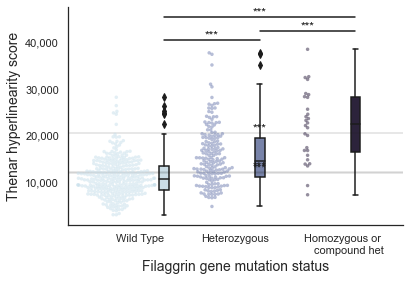

In [457]:
"""
Different colours
"""
"""
T0.02 - figure
"""

a = pd.read_csv("thenarscoresalldf.csv")
ylab = 'Thenar hyperlinearity score'

ya="Thenar scores"
result01 = "***"
result12 = "***"
result02 = "***"

plotbox(a=a, xa="FLG status", ya=ya, ylabel=ylab, alpha=0.5, s=3.5, colours="ch:s=.25,rot=-.25")
ymax = a[ya].max()
addstats(result01, result12, result02, ymax)
#plt.title('Thenar dataset')

#####add in scores from other images
x1, x2 = -1, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
h = 2
col = 'k'

y = 12214
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)

y = 11855
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)

y = 20479
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)


sns.despine()
plt.show()







In [29]:
"""
P0.02 - dataframe generation
"""
palmwtdf = pd.DataFrame.from_dict(palmwtscores, orient="index")
palmwtdf['ID'] = palmwtdf.index
palmwtdf = palmwtdf.assign(FLGstatus = 0)

palmhetdf = pd.DataFrame.from_dict(palmhetscores, orient="index")
palmhetdf['ID'] = palmhetdf.index
palmhetdf = palmhetdf.assign(FLGstatus = 1)

palmhomodf = pd.DataFrame.from_dict(palmhomoscores, orient="index")
palmhomodf['ID'] = palmhomodf.index
palmhomodf = palmhomodf.assign(FLGstatus = 2)




palmalldf = pd.concat([palmwtdf, palmhetdf, palmhomodf])
palmalldf.set_index(['ID'])

palmalldf.columns = ['Palmar scores', 'ID', 'FLG status']

palmalldf.to_csv("palmalldf.csv")
#palmalldf.head()



Statistics=69.427, p=0.000
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
   Het   Homo  5565.7638 0.001   3185.3715   7946.156   True
   Het     WT -3869.1617 0.001  -4959.9836 -2778.3398   True
  Homo     WT -9434.9255 0.001 -11742.1438 -7127.7071   True
------------------------------------------------------------


In [ ]:
"""
P0.02 - figure
"""

a = pd.read_csv("palmalldf.csv")
ylab = 'Palmar hyperlinearity score'

ya="Palmar scores"
result01 = "***"
result12 = "***"
result02 = "***"
 
plotbox(a=a, xa="FLG status", ya=ya, ylabel=ylab, s=3, alpha=0.6)
ymax = a[ya].max()
addstats(result01, result12, result02, ymax)


######add scores
y = 17584
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)

y = 18636
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)

y = 33610
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)


#plt.title('Palmar dataset')
sns.despine()
plt.show()



In [12]:
list_palmwtscores = list(palmwtscores.values())
list_palmhetscores = list(palmhetscores.values())
list_palmhomoscores = list(palmhomoscores.values())
pvalues(list_palmwtscores, list_palmhetscores, list_palmhomoscores)


print(statistics.mean(list_palmwtscores))
st_dev = statistics.pstdev(list_palmwtscores)
print("Standard deviation of the palm wt 0.02: " + str(st_dev))
print(" ")

print(statistics.mean(list_palmhetscores))
st_dev = statistics.pstdev(list_palmhetscores)
print("Standard deviation of the palm -/+ 0.02: " + str(st_dev))
print(" ")

print(statistics.mean(list_palmhomoscores))
st_dev = statistics.pstdev(list_palmhomoscores)
print("Standard deviation of the palm -/- 0.02: " + str(st_dev))



Statistics=69.427, p=0.000
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
   Het   Homo  5565.7638 0.001   3185.3715   7946.156   True
   Het     WT -3869.1617 0.001  -4959.9836 -2778.3398   True
  Homo     WT -9434.9255 0.001 -11742.1438 -7127.7071   True
------------------------------------------------------------
16307
Standard deviation of the palm wt 0.02: 4292.961099287996
 
20176
Standard deviation of the palm -/+ 0.02: 5825.6999579449675
 
25742
Standard deviation of the palm -/- 0.02: 6170.694126271371


In [ ]:
"""
different colours
"""

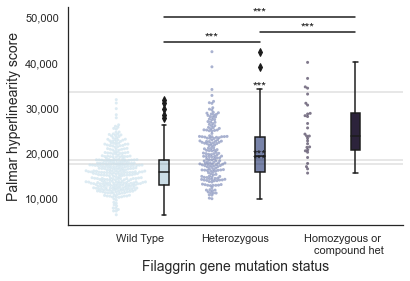

In [459]:
"""
P0.02 - figure
"""

a = pd.read_csv("palmalldf.csv")
ylab = 'Palmar hyperlinearity score'

ya="Palmar scores"
result01 = "***"
result12 = "***"
result02 = "***"
 
plotbox(a=a, xa="FLG status", ya=ya, ylabel=ylab, s=3, alpha=0.6, colours="ch:s=.25,rot=-.25")
ymax = a[ya].max()
addstats(result01, result12, result02, ymax)


######add scores
y = 17584
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)

y = 18636
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)

y = 33610
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)


#plt.title('Palmar dataset')
sns.despine()
plt.show()




In [116]:
#

In [117]:
#

In [118]:
#

In [120]:
#

In [119]:
#

In [121]:
#

In [122]:
#

In [123]:
#

In [124]:
#

In [ ]:
"""
Create scores for images from other studies
"""

In [5]:
os.chdir(###PATH HERE) ##os.chdir("/Users/L/Documents/eczema ML models/")
    
img = io.imread("apparent2.png", as_gray=True)
#img = resize(img, (512, 256))
#imagewt = sato(img, mode='constant')
plt.axis('off') 
plt.imshow(img, cmap='gray')  
#i = i + 1

In [364]:
os.chdir(###PATH HERE)

no = io.imread("no.png", as_gray=True) 
mild = io.imread("mild.png", as_gray=True) 
severe = io.imread("severe.png", as_gray=True) 

no1 = io.imread("no1.png", as_gray=True) 
suspected = io.imread("suspectede.png", as_gray=True) 
apparent = io.imread("apparent2.png", as_gray=True) 







In [366]:
external = [no, mild, severe, no1, suspected, apparent]    
names =  ['no t', 'mild t', 'severe t', 'no p', 'suspected p', 'apparent p']    

i = 0

for img in external:
    img = resize(img, (512, 256))
    imagewt = sato(img)
    number = np.sum(imagewt>0.02)
    print(f"for {names[i]}: {number}")
    i = i+1



for no t: 12214
for mild t: 11855
for severe t: 20479
for no p: 17584
for suspected p: 18636
for apparent p: 33610


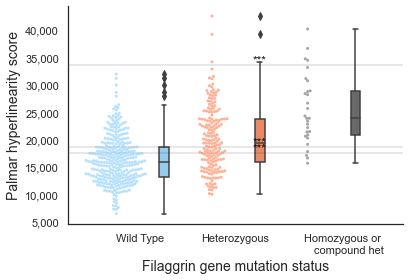

In [367]:
#os.chdir("___")
"""
P0.02 - figure
"""



a = pd.read_csv("palmalldf.csv")
ylab = 'Palmar hyperlinearity score'

ya="Palmar scores"
result01 = "***"
result12 = "***"
result02 = "***"
 
plotbox(a=a, xa="FLG status", ya=ya, ylabel=ylab, s=3, alpha=0.6)
ymax = a[ya].max()
x1, x2 = -1, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
h = 2
col = 'k'

y = 17584
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)

y = 18636
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)

y = 33610
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)

#plt.title('Palmar dataset')
sns.despine()
plt.show()



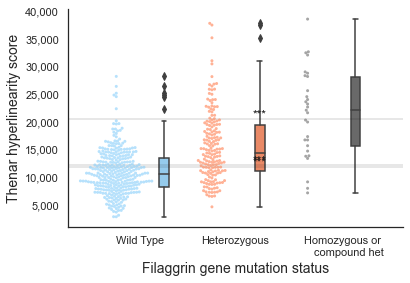

In [368]:
#os.chdir("")
"""
P0.02 - figure
"""

a = pd.read_csv("thenarscoresalldf.csv")
ylab = 'Thenar hyperlinearity score'

ya="Thenar scores"
result01 = "***"
result12 = "***"
result02 = "***"
 
plotbox(a=a, xa="FLG status", ya=ya, ylabel=ylab, s=3, alpha=0.6)
ymax = a[ya].max()
x1, x2 = -1, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
h = 2
col = 'k'

y = 12214
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)

y = 11855
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)

y = 20479
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)

#plt.title('Palmar dataset')
sns.despine()
plt.show()




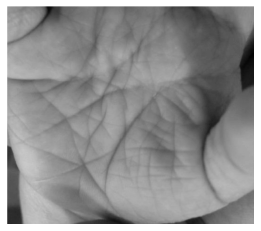

In [205]:
"""
AGE
"""



In [7]:
import pandas as pd
#mcv = pd.read_csv("merged_csv2_scores.csv")
#os.chdir("/Users/L/Documents/43 FLG hyperlinearity/")
#mcv4 = pd.read_csv("merged_csv6_scores.csv",  engine='python')

mcv4 = pd.read_excel("merged_scores.xlsx")

In [3]:
mcv4.head(1)

NameError: name 'mcv4' is not defined

In [8]:
age_list = mcv4['age']
print(f" min age is: {min(age_list)}")
print(f" min age is: {max(age_list)}")

i = 0
for a in age_list:
    if a < 18:
        i = i + 1
print(f"patients aged <18yo: {i}")

 min age is: 0.2
 min age is: 30.9
patients aged <18yo: 459


In [177]:
"""
FLG PREVALENCE BY HYPERLINEARITY SCORE DECILE
"""

In [283]:
bins = 10  

newmcv = pd.qcut(mcv4['thenar_scores'], bins, labels=range(bins))
newmcv2 = pd.qcut(mcv4['palmar_scores'], bins, labels=range(bins))


mcv4['thenar_bins'] = newmcv
mcv4.loc[mcv4['thenar_bins'] == 0].flg_binary.value_counts()

mcv4['palmar_bins'] = newmcv2
mcv4.loc[mcv4['palmar_bins'] == 9].flg_binary.value_counts()

1    45
0     8
Name: flg_binary, dtype: int64

In [279]:
deciles = [
0,
1,
2,
3,
4,
5,
6,
7,
8,
9,
0,
1,
2,
3,
4,
5,
6,
7,
8,
9
]

flgprevalence = [
    89,
74,
45,
34,
36,
34,
17,
26,
26,
9,
85,
60,
51,
40,
32,
34,
25,
25,
19,
20 
]

site = [
    'Thenar',
'Thenar',
'Thenar',
'Thenar',
'Thenar',
'Thenar',
'Thenar',
'Thenar',
'Thenar',
'Thenar',
'Palmar',
'Palmar',
'Palmar',
'Palmar',
'Palmar',
'Palmar',
'Palmar',
'Palmar',
'Palmar',
'Palmar'
]



<Figure size 432x288 with 0 Axes>

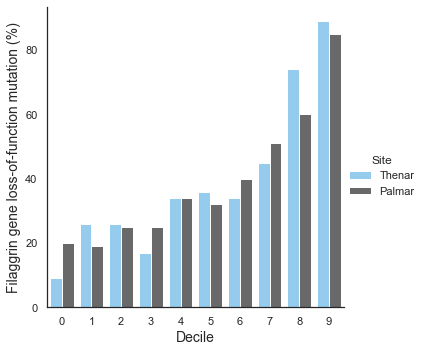

In [280]:
data = {'Decile': deciles[::-1], 'FLGprevalence': flgprevalence, 'Site': site}
# Create DataFrame.
df = pd.DataFrame(data)

colours = ['lightskyblue', 'dimgrey']
sns.set(style="white")
fig = plt.figure(figsize=(6,4))
g = sns.catplot(x="Decile", y="FLGprevalence", hue="Site",  
            kind="bar",palette=colours, data=df)#palette="ch:3.0" #,
g.set_axis_labels(x_var="Decile", y_var="Filaggrin gene loss-of-function mutation (%)", fontsize=14)





In [289]:
"""
COMPUTATIONAL VS CLINICAL SCORE
"""

'\nCOMPUTATIONAL VS CLINICAL SCORE\n'

In [7]:
"""
figs4 stats
"""

mcv4.head(1)
absent_h = mcv4[mcv4['clinical_hyperlinearity'] == 0]
mild_h = mcv4[mcv4['clinical_hyperlinearity'] == 1]
moderate_h = mcv4[mcv4['clinical_hyperlinearity'] == 2]
severe_h = mcv4[mcv4['clinical_hyperlinearity'] == 3]



In [8]:
absent_thenar = absent_h['thenar_scores']
mild_thenar = mild_h['thenar_scores']
moderate_thenar = moderate_h['thenar_scores']
severe_thenar = severe_h['thenar_scores']



In [11]:
list_thenar_absent_scores = list(absent_thenar)
list_thenar_mild_scores  = list(mild_thenar)
list_thenar_moderate_scores  = list(moderate_thenar)
list_thenar_severe_scores  = list(severe_thenar)


pvalues4(list_thenar_absent_scores, list_thenar_mild_scores,
         list_thenar_moderate_scores, list_thenar_severe_scores)

F, p = f_oneway(list_thenar_absent_scores, list_thenar_mild_scores,
                list_thenar_moderate_scores, list_thenar_severe_scores)
print('Statistics=%.3f, p=%.3f' % (F, p))
scores = []
scores = list_thenar_absent_scores + list_thenar_mild_scores +list_thenar_moderate_scores  + list_thenar_severe_scores

group = []
for i in range(len(list_thenar_absent_scores)):
    group.append('absent')
for i in range(len(list_thenar_mild_scores )):
    group.append('mild')
for i in range(len(list_thenar_moderate_scores)):
    group.append('moderate')
for i in range(len(list_thenar_severe_scores)):
    group.append('severe')
df_p = pd.DataFrame({'score': scores, 'group': group})
tukey = pairwise_tukeyhsd(endog=df_p['score'],
                         groups=df_p['group'],
                         alpha=0.05)
print(tukey)  



Statistics=171.612, p=0.000
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1   group2   meandiff  p-adj    lower      upper    reject
----------------------------------------------------------------
  absent     mild  1432.4564 0.4517 -1062.0203  3926.9331  False
  absent moderate  6014.0008  0.001  3420.3733  8607.6282   True
  absent   severe 13652.5485  0.001 10892.1933 16412.9036   True
    mild moderate  4581.5443  0.001  3461.6435  5701.4452   True
    mild   severe 12220.0921  0.001 10754.8839 13685.3003   True
moderate   severe  7638.5477  0.001  6010.2589  9266.8366   True
----------------------------------------------------------------
Statistics=171.612, p=0.000
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1   group2   meandiff  p-adj    lower      upper    reject
----------------------------------------------------------------
  absent     mild  1432.4564 0.4517 -1062.0203  3926.9331  False
  absent moderate  6014.0008  0.00

In [12]:
df_p.head(1)

,score,group
0,8294,absent


In [13]:
st_dev = statistics.pstdev(absent_thenar)
print(statistics.mean(absent_thenar))
print("Standard deviation of the thenar wt 0.02: " + str(st_dev))
print(" ")

print(statistics.mean(mild_thenar))
st_dev = statistics.pstdev(mild_thenar)
print("Standard deviation of the thenar -/+ 0.02: " + str(st_dev))
print(" ")

print(statistics.mean(moderate_thenar))
st_dev = statistics.pstdev(moderate_thenar)
print("Standard deviation of the thenar -/- 0.02: " + str(st_dev))

print(statistics.mean(severe_thenar))
st_dev = statistics.pstdev(severe_thenar)
print("Standard deviation of the thenar -/- 0.02: " + str(st_dev))

9071.3
Standard deviation of the thenar wt 0.02: 2605.869991001086
 
10503.75641025641
Standard deviation of the thenar -/+ 0.02: 3537.870637232549
 
15085.300751879699
Standard deviation of the thenar -/- 0.02: 4383.042313802811
22723.848484848484
Standard deviation of the thenar -/- 0.02: 6375.413745913956


/Users/l/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 41.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='score'>

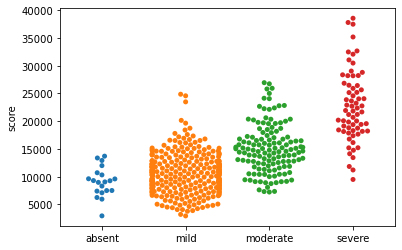

In [14]:
sns.swarmplot(data=df_p, x=group, y="score")

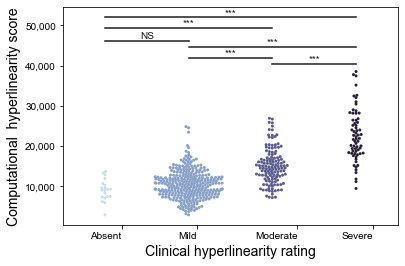

In [8]:
"""
Fig S4
"""

"""
Fig S4
"""
ya="thenar_scores"
xa="clinical_hyperlinearity"
ylabel = "Thenar hyperlineartiy score"
a=mcv4
#plotbox(a=a, xa=xa, ya=ya, ylabel=ylab, alpha=0.5, s=3.5)
#colours = ['lightskyblue','coral', 'dimgrey', 'red']
colours="ch:s=.25,rot=-.25"
#colours="dark:#5A9"
ax = sns.swarmplot(x=xa, y=ya, data=mcv4, alpha=1, s=3, palette=colours)
ymax = a[ya].max()
h = 2
col = 'k'

result01 = "NS"
result12 = "***"
result13 = "***"
result02 = "***"
result03 = "***"
result23 = "***"

###COMPARISON 0 AND 3
x1, x2 = 0, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y = a[ya].max() + (a[ya].max() * 0.35 )
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, result03, ha='center', va='bottom', color=col)


###COMPARISON 0 AND 2
x1, x2 = 0, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y = a[ya].max() + (a[ya].max() * 0.28 )
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, result02, ha='center', va='bottom', color=col)
#plt.title('Thenar dataset')

###COMPARISON 1 AND 3
x1, x2 = 1, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y = a[ya].max() + (a[ya].max() * 0.16 )
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, result13, ha='center', va='bottom', color=col)




 ###COMPARISON 0 AND 1
x1, x2 = 0, 1   
y = a[ya].max() + (a[ya].max() * 0.20 )
h = 2
col = 'k'

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)
    

###COMPARISON 2 AND 3
x1, x2 = 2, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y = a[ya].max() + (a[ya].max() * 0.05 )
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, result23, ha='center', va='bottom', color=col)





###COMPARISON 1 AND 2
x1, x2 = 1, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())

y = a[ya].max() + (a[ya].max() * 0.09 )
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, result12, ha='center', va='bottom', color=col)



sns.set(style="white")
swarmplot_offset = -0.5 
#xlim_offset = -1  
#palette=colours
plt.xticks([0.2, 1.1, 2.3, 3.2], ['Absent', 'Mild', 'Moderate', 'Severe'])
ax.set_xticklabels(ax.get_xticklabels(), ha="right")  
#ax.set_xlim(xlim_offset,ax.get_xlim()[1]) 
ax.set_xlabel('Clinical hyperlinearity rating', fontsize=14)
ax.set_ylabel('Computational  hyperlinearity score', fontsize=14)
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))









'\n\n\n\n\nresult01 = "NS"\nresult12 = "***"\nresult13 = "***"\nresult02 = "***"\nresult03 = "***"\nresult23 = "***"\n\n###COMPARISON 0 AND 3\nx1, x2 = 0, 3   # columns \'Sat\' and \'Sun\' (first column: 0, see plt.xticks())\ny = a[ya].max() + (a[ya].max() * 0.35 )\nplt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)\nplt.text((x1+x2)*.5, y+h, result03, ha=\'center\', va=\'bottom\', color=col)\n\n\n###COMPARISON 0 AND 2\nx1, x2 = 0, 2   # columns \'Sat\' and \'Sun\' (first column: 0, see plt.xticks())\ny = a[ya].max() + (a[ya].max() * 0.28 )\nplt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)\nplt.text((x1+x2)*.5, y+h, result02, ha=\'center\', va=\'bottom\', color=col)\n#plt.title(\'Thenar dataset\')\n\n###COMPARISON 1 AND 3\nx1, x2 = 1, 3   # columns \'Sat\' and \'Sun\' (first column: 0, see plt.xticks())\ny = a[ya].max() + (a[ya].max() * 0.16 )\nplt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)\nplt.text((x1+x2)*.5, y+h, result13, ha=\'center\', va=\'bottom

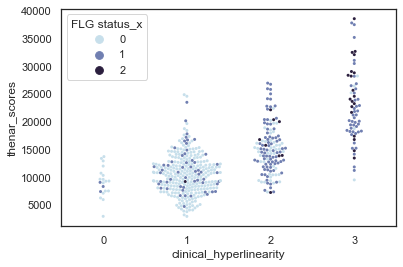

In [9]:
hue_graph = "FLG status_x"


"""
Fig S4
"""
ya="thenar_scores"
xa="clinical_hyperlinearity"
ylabel = "Thenar hyperlineartiy score"
a=mcv4
#plotbox(a=a, xa=xa, ya=ya, ylabel=ylab, alpha=0.5, s=3.5)
#colours = ['lightskyblue','coral', 'dimgrey', 'red']
colours="ch:s=.25,rot=-.25"
#colours="dark:#5A9"
ax = sns.swarmplot(x=xa, y=ya, data=mcv4, alpha=1, s=3, hue=hue_graph, palette=colours)
ymax = a[ya].max()
h = 2
col = 'k'

"""




result01 = "NS"
result12 = "***"
result13 = "***"
result02 = "***"
result03 = "***"
result23 = "***"

###COMPARISON 0 AND 3
x1, x2 = 0, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y = a[ya].max() + (a[ya].max() * 0.35 )
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, result03, ha='center', va='bottom', color=col)


###COMPARISON 0 AND 2
x1, x2 = 0, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y = a[ya].max() + (a[ya].max() * 0.28 )
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, result02, ha='center', va='bottom', color=col)
#plt.title('Thenar dataset')

###COMPARISON 1 AND 3
x1, x2 = 1, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y = a[ya].max() + (a[ya].max() * 0.16 )
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, result13, ha='center', va='bottom', color=col)




 ###COMPARISON 0 AND 1
x1, x2 = 0, 1   
y = a[ya].max() + (a[ya].max() * 0.20 )
h = 2
col = 'k'

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)
    

###COMPARISON 2 AND 3
x1, x2 = 2, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y = a[ya].max() + (a[ya].max() * 0.05 )
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, result23, ha='center', va='bottom', color=col)





###COMPARISON 1 AND 2
x1, x2 = 1, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())

y = a[ya].max() + (a[ya].max() * 0.09 )
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, result12, ha='center', va='bottom', color=col)



sns.set(style="white")
swarmplot_offset = -0.5 
#xlim_offset = -1  
#palette=colours
plt.xticks([0.2, 1.1, 2.3, 3.2], ['Absent', 'Mild', 'Moderate', 'Severe'])
ax.set_xticklabels(ax.get_xticklabels(), ha="right")  
#ax.set_xlim(xlim_offset,ax.get_xlim()[1]) 
ax.set_xlabel('Clinical hyperlinearity rating', fontsize=14)
ax.set_ylabel('Computational  hyperlinearity score', fontsize=14)
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))


"""






'\n\n\n\n\nresult01 = "NS"\nresult12 = "***"\nresult13 = "***"\nresult02 = "***"\nresult03 = "***"\nresult23 = "***"\n\n###COMPARISON 0 AND 3\nx1, x2 = 0, 3   # columns \'Sat\' and \'Sun\' (first column: 0, see plt.xticks())\ny = a[ya].max() + (a[ya].max() * 0.35 )\nplt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)\nplt.text((x1+x2)*.5, y+h, result03, ha=\'center\', va=\'bottom\', color=col)\n\n\n###COMPARISON 0 AND 2\nx1, x2 = 0, 2   # columns \'Sat\' and \'Sun\' (first column: 0, see plt.xticks())\ny = a[ya].max() + (a[ya].max() * 0.28 )\nplt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)\nplt.text((x1+x2)*.5, y+h, result02, ha=\'center\', va=\'bottom\', color=col)\n#plt.title(\'Thenar dataset\')\n\n###COMPARISON 1 AND 3\nx1, x2 = 1, 3   # columns \'Sat\' and \'Sun\' (first column: 0, see plt.xticks())\ny = a[ya].max() + (a[ya].max() * 0.16 )\nplt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)\nplt.text((x1+x2)*.5, y+h, result13, ha=\'center\', va=\'bottom

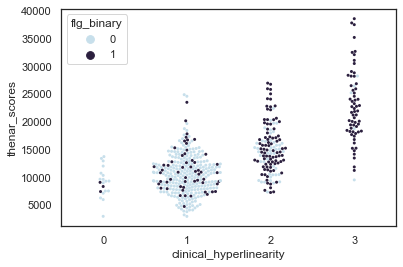

In [10]:
hue_graph_binary = 'flg_binary'

hue_graph = "FLG status_x"


"""
Fig S4
"""
ya="thenar_scores"
xa="clinical_hyperlinearity"
ylabel = "Thenar hyperlineartiy score"
a=mcv4
#plotbox(a=a, xa=xa, ya=ya, ylabel=ylab, alpha=0.5, s=3.5)
#colours = ['lightskyblue','coral', 'dimgrey', 'red']
colours="ch:s=.25,rot=-.25"
#colours="dark:#5A9"
ax = sns.swarmplot(x=xa, y=ya, data=mcv4, alpha=1, s=3, 
                   hue=hue_graph_binary, palette=colours)
ymax = a[ya].max()
h = 2
col = 'k'

"""




result01 = "NS"
result12 = "***"
result13 = "***"
result02 = "***"
result03 = "***"
result23 = "***"

###COMPARISON 0 AND 3
x1, x2 = 0, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y = a[ya].max() + (a[ya].max() * 0.35 )
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, result03, ha='center', va='bottom', color=col)


###COMPARISON 0 AND 2
x1, x2 = 0, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y = a[ya].max() + (a[ya].max() * 0.28 )
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, result02, ha='center', va='bottom', color=col)
#plt.title('Thenar dataset')

###COMPARISON 1 AND 3
x1, x2 = 1, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y = a[ya].max() + (a[ya].max() * 0.16 )
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, result13, ha='center', va='bottom', color=col)




 ###COMPARISON 0 AND 1
x1, x2 = 0, 1   
y = a[ya].max() + (a[ya].max() * 0.20 )
h = 2
col = 'k'

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)
    

###COMPARISON 2 AND 3
x1, x2 = 2, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y = a[ya].max() + (a[ya].max() * 0.05 )
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, result23, ha='center', va='bottom', color=col)





###COMPARISON 1 AND 2
x1, x2 = 1, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())

y = a[ya].max() + (a[ya].max() * 0.09 )
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, result12, ha='center', va='bottom', color=col)



sns.set(style="white")
swarmplot_offset = -0.5 
#xlim_offset = -1  
#palette=colours
plt.xticks([0.2, 1.1, 2.3, 3.2], ['Absent', 'Mild', 'Moderate', 'Severe'])
ax.set_xticklabels(ax.get_xticklabels(), ha="right")  
#ax.set_xlim(xlim_offset,ax.get_xlim()[1]) 
ax.set_xlabel('Clinical hyperlinearity rating', fontsize=14)
ax.set_ylabel('Computational  hyperlinearity score', fontsize=14)
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))


"""







'\n\n\n\n\nresult01 = "NS"\nresult12 = "***"\nresult13 = "***"\nresult02 = "***"\nresult03 = "***"\nresult23 = "***"\n\n###COMPARISON 0 AND 3\nx1, x2 = 0, 3   # columns \'Sat\' and \'Sun\' (first column: 0, see plt.xticks())\ny = a[ya].max() + (a[ya].max() * 0.35 )\nplt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)\nplt.text((x1+x2)*.5, y+h, result03, ha=\'center\', va=\'bottom\', color=col)\n\n\n###COMPARISON 0 AND 2\nx1, x2 = 0, 2   # columns \'Sat\' and \'Sun\' (first column: 0, see plt.xticks())\ny = a[ya].max() + (a[ya].max() * 0.28 )\nplt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)\nplt.text((x1+x2)*.5, y+h, result02, ha=\'center\', va=\'bottom\', color=col)\n#plt.title(\'Thenar dataset\')\n\n###COMPARISON 1 AND 3\nx1, x2 = 1, 3   # columns \'Sat\' and \'Sun\' (first column: 0, see plt.xticks())\ny = a[ya].max() + (a[ya].max() * 0.16 )\nplt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)\nplt.text((x1+x2)*.5, y+h, result13, ha=\'center\', va=\'bottom

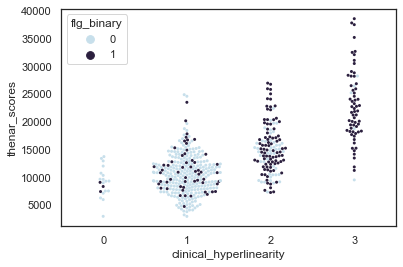

In [86]:
mcv4.head(1)
age_categorised = []
for x in mcv4['age']:
    if x < 1:
        age_categorised.append(0)
    if x >=1 and x <= 5:
        age_categorised.append(1)
    if x >5 and x <=10:
        age_categorised.append(2)
    if x >10 and x <= 16:
        age_categorised.append(3)
    if x > 16:
        age_categorised.append(4)
        

age_categorised_2 = []
for x in mcv4['age']:
    if x < 2:
        age_categorised_2.append(0)
    if x >=2 and x <= 10:
        age_categorised_2.append(1)
    if x > 10:
        age_categorised_2.append(2)

age_categorised_2_labels= ["<2 years \n n=41" , '2-10 years \n n=227', '11+ years \n n=263']



#2    263
#1    227
#0     41

In [87]:
mcv4['age_categorised'] = age_categorised
mcv4['age_categorised_2'] = age_categorised_2

'\n\n\n\n\nresult01 = "NS"\nresult12 = "***"\nresult13 = "***"\nresult02 = "***"\nresult03 = "***"\nresult23 = "***"\n\n###COMPARISON 0 AND 3\nx1, x2 = 0, 3   # columns \'Sat\' and \'Sun\' (first column: 0, see plt.xticks())\ny = a[ya].max() + (a[ya].max() * 0.35 )\nplt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)\nplt.text((x1+x2)*.5, y+h, result03, ha=\'center\', va=\'bottom\', color=col)\n\n\n###COMPARISON 0 AND 2\nx1, x2 = 0, 2   # columns \'Sat\' and \'Sun\' (first column: 0, see plt.xticks())\ny = a[ya].max() + (a[ya].max() * 0.28 )\nplt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)\nplt.text((x1+x2)*.5, y+h, result02, ha=\'center\', va=\'bottom\', color=col)\n#plt.title(\'Thenar dataset\')\n\n###COMPARISON 1 AND 3\nx1, x2 = 1, 3   # columns \'Sat\' and \'Sun\' (first column: 0, see plt.xticks())\ny = a[ya].max() + (a[ya].max() * 0.16 )\nplt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)\nplt.text((x1+x2)*.5, y+h, result13, ha=\'center\', va=\'bottom

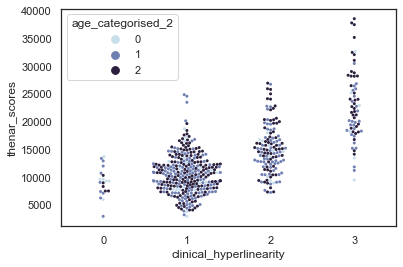

In [78]:
hue_graph_binary = 'age_categorised_2'


"""
Fig S4
"""
ya="thenar_scores"
xa="clinical_hyperlinearity"
ylabel = "Thenar hyperlineartiy score"
a=mcv4
#plotbox(a=a, xa=xa, ya=ya, ylabel=ylab, alpha=0.5, s=3.5)
#colours = ['lightskyblue','coral', 'dimgrey', 'red']
colours="ch:s=.25,rot=-.25"
#colours="dark:#5A9"
ax = sns.swarmplot(x=xa, y=ya, data=mcv4, alpha=1, s=3, 
                   hue=hue_graph_binary, palette=colours)
ymax = a[ya].max()
h = 2
col = 'k'

"""




result01 = "NS"
result12 = "***"
result13 = "***"
result02 = "***"
result03 = "***"
result23 = "***"

###COMPARISON 0 AND 3
x1, x2 = 0, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y = a[ya].max() + (a[ya].max() * 0.35 )
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, result03, ha='center', va='bottom', color=col)


###COMPARISON 0 AND 2
x1, x2 = 0, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y = a[ya].max() + (a[ya].max() * 0.28 )
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, result02, ha='center', va='bottom', color=col)
#plt.title('Thenar dataset')

###COMPARISON 1 AND 3
x1, x2 = 1, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y = a[ya].max() + (a[ya].max() * 0.16 )
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, result13, ha='center', va='bottom', color=col)




 ###COMPARISON 0 AND 1
x1, x2 = 0, 1   
y = a[ya].max() + (a[ya].max() * 0.20 )
h = 2
col = 'k'

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)
    

###COMPARISON 2 AND 3
x1, x2 = 2, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y = a[ya].max() + (a[ya].max() * 0.05 )
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, result23, ha='center', va='bottom', color=col)





###COMPARISON 1 AND 2
x1, x2 = 1, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())

y = a[ya].max() + (a[ya].max() * 0.09 )
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, result12, ha='center', va='bottom', color=col)



sns.set(style="white")
swarmplot_offset = -0.5 
#xlim_offset = -1  
#palette=colours
plt.xticks([0.2, 1.1, 2.3, 3.2], ['Absent', 'Mild', 'Moderate', 'Severe'])
ax.set_xticklabels(ax.get_xticklabels(), ha="right")  
#ax.set_xlim(xlim_offset,ax.get_xlim()[1]) 
ax.set_xlabel('Clinical hyperlinearity rating', fontsize=14)
ax.set_ylabel('Computational  hyperlinearity score', fontsize=14)
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))


"""







In [ ]:
#mcv4['age_categorised_2'].value_counts()
mcv4.head(1)

In [135]:
"""
BOXPLOT FOR EACH AGE GROUP
"""

NameError: name 'altlabel' is not defined

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (0,).

<Figure size 432x288 with 1 Axes>

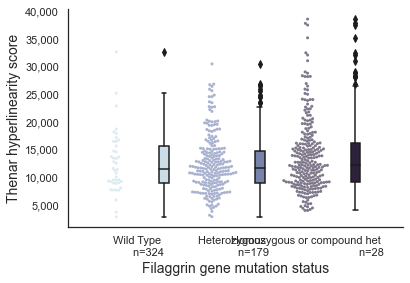

In [154]:
a = mcv4
a = mcv4
xa = 'age_categorised_2'
ylab = 'Thenar hyperlinearity score'
ylabel = "Thenar hyperlineartiy score"
alpha=0.5
s=3.5
colours=['lightskyblue','coral', 'dimgrey']
hue_a = 'flg_binary'

colours=['lightskyblue','coral', 'dimgrey']
hue_a = 'flg_binary'
colours="ch:s=.25,rot=-.25"

ya="thenar_scores"
result01 = "***"
result12 = "***"
result02 = "***"
 
plotbox3(a=a, xa=xa, ya=ya, ylabel=ylab, s=3, alpha=0.6, colours=colours) #hue_a=hue_a)
ymax = a[ya].max()


#plt.title('Palmar dataset')
sns.despine()
plt.show()


In [124]:

""" 
PREDICTION BY AGE
"""

mcv4.head(1)
age_2_h = mcv4[mcv4['age_categorised_2'] == 2]
age_1_h = mcv4[mcv4['age_categorised_2'] == 1]


age_2_thenar = age_2_h['thenar_scores']
age_1_thenar  = age_1_h['thenar_scores']


list_age_thenar_2 = list(age_2_thenar)
list_age_thenar_1  = list(age_1_thenar )
 
###make dataset
   ###list_thenar_severe_scores  
    
dataset_assessed = age_2_h
thenar_scores_a = list_age_thenar_2 


#palmar_scores = list(mcv4['palmar_scores'])
age_a = list(dataset_assessed['age'])
labels_a = list(dataset_assessed['flg_binary'])

age_and_thenar_a = []
all_flg_a = []
for i in range(len(thenar_scores_a)):
    features = [thenar_scores_a[i], age_a[i]]
    for x in features:
        counter = 0
        if np.isnan(x):
            counter = counter + 1
            #error_count = error_count + 1
            break
    if counter == 0:
        age_and_thenar_a.append(features)
        all_flg_a.append(labels_a[i])







In [125]:
"""
AGE_AND_THENAR_2
"""
datasetx = age_and_thenar_a
labelsx = all_flg_a

test_size=0.1
seed=9

print("[INFO] training classifier...")
models = []
models.append(('LogReg', LogisticRegression(random_state=seed, max_iter=400)))
models.append(('SVM-L', LinearSVC(random_state=seed, dual=False)))
print("done")

trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal = train_test_split(np.array(datasetx),
                                                                                          np.array(labelsx),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)
                                                                           #shuffle=True) 
                                                                                                  
print("[STATUS] splitted train and test data...")
print("Train data  : {}".format(trainDataGlobal.shape))
print("Test data   : {}".format(testDataGlobal.shape))
print("Train labels: {}".format(trainLabelsGlobal.shape))
print("Test labels : {}".format(testLabelsGlobal.shape))


names   = []
model_test_cv(kfoldsplits=10)    


#specificity = make_scorer(recall_score, pos_label=0) #The label 0 is 

[INFO] training classifier...
done
[STATUS] splitted train and test data...
Train data  : (236, 2)
Test data   : (27, 2)
Train labels: (236,)
Test labels : (27,)
LogReg: accuracy mean is 71.3% with SD 10.3
SVM-L: accuracy mean is 71.3% with SD 9.8
LogReg: roc_auc mean is 74.2% with SD 12.3
SVM-L: roc_auc mean is 74.5% with SD 16.0
LogReg: make_scorer(recall_score, pos_label=1) mean is 55.0% with SD 12.9
SVM-L: make_scorer(recall_score, pos_label=1) mean is 48.3% with SD 14.2
LogReg: make_scorer(recall_score, pos_label=0) mean is 83.4% with SD 12.2
SVM-L: make_scorer(recall_score, pos_label=0) mean is 88.2% with SD 10.3


In [130]:
###make dataset
   ###list_thenar_severe_scores  
    
dataset_assessed = age_1_h
thenar_scores_a = list_age_thenar_1


#palmar_scores = list(mcv4['palmar_scores'])
age_a = list(dataset_assessed['age'])
labels_a = list(dataset_assessed['flg_binary'])

age_and_thenar_a = []
all_flg_a = []
for i in range(len(thenar_scores_a)):
    features = [thenar_scores_a[i], age_a[i]]
    for x in features:
        counter = 0
        if np.isnan(x):
            counter = counter + 1
            #error_count = error_count + 1
            break
    if counter == 0:
        age_and_thenar_a.append(features)
        all_flg_a.append(labels_a[i])








In [131]:
"""
AGE_AND_THENAR_2
"""
datasetx = age_and_thenar_a
labelsx = all_flg_a

test_size=0.1
seed=9

print("[INFO] training classifier...")
models = []
models.append(('LogReg', LogisticRegression(random_state=seed, max_iter=400)))
models.append(('SVM-L', LinearSVC(random_state=seed, dual=False)))
print("done")

trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal = train_test_split(np.array(datasetx),
                                                                                          np.array(labelsx),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)
                                                                           #shuffle=True) 
                                                                                                  
print("[STATUS] splitted train and test data...")
print("Train data  : {}".format(trainDataGlobal.shape))
print("Test data   : {}".format(testDataGlobal.shape))
print("Train labels: {}".format(trainLabelsGlobal.shape))
print("Test labels : {}".format(testLabelsGlobal.shape))


names   = []
model_test_cv(kfoldsplits=10)    


#specificity = make_scorer(recall_score, pos_label=0) #The label 0 is 

[INFO] training classifier...
done
[STATUS] splitted train and test data...
Train data  : (204, 2)
Test data   : (23, 2)
Train labels: (204,)
Test labels : (23,)
LogReg: accuracy mean is 62.7% with SD 7.5
SVM-L: accuracy mean is 72.0% with SD 6.9
LogReg: roc_auc mean is 70.1% with SD 11.3
SVM-L: roc_auc mean is 73.6% with SD 10.4
LogReg: make_scorer(recall_score, pos_label=1) mean is 46.4% with SD 16.6
SVM-L: make_scorer(recall_score, pos_label=1) mean is 45.6% with SD 15.0
LogReg: make_scorer(recall_score, pos_label=0) mean is 74.6% with SD 11.7
SVM-L: make_scorer(recall_score, pos_label=0) mean is 89.5% with SD 8.0


In [128]:
mcv4['age_categorised_2'].value_counts()

2    263
1    227
0     41
Name: age_categorised_2, dtype: int64

In [229]:
"""
Fig1s for each age category
"""


In [88]:
age0 = mcv4[mcv4['age_categorised_2'] == 0]
age1 = mcv4[(mcv4['age_categorised_2'] == 1)]
age2 = mcv4[mcv4['age_categorised_2'] == 2]

"\n\naddstats(result01, result12, result02, ymax)\n#plt.title('Thenar dataset')\n\n#####add in scores from other images\nx1, x2 = -1, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())\nh = 2\ncol = 'k'\n\ny = 12214\nplt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)\nplt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)\n\ny = 11855\nplt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)\nplt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)\n\ny = 20479\nplt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)\nplt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)\n\n\nsns.despine()\nplt.show()\n"

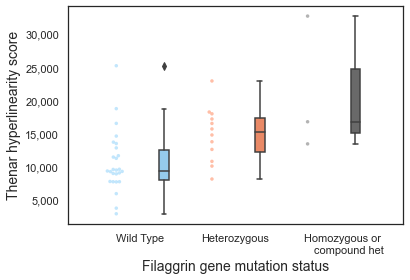

In [93]:
"""
T0.02 - figure
"""

a = age0
ylab = 'Thenar hyperlinearity score'

ya="thenar_scores"
result01 = "***"
result12 = "***"
result02 = "***"

plotbox(a=a, xa="FLG status_x", ya=ya, ylabel=ylab, alpha=0.5, s=3.5)
#plotbox2(a=a, xa="FLG status", ya=ya, ylabel=ylab, alpha=0.5, s=3.5, altlabel=True)
ymax = a[ya].max()
"""

addstats(result01, result12, result02, ymax)
#plt.title('Thenar dataset')

#####add in scores from other images
x1, x2 = -1, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
h = 2
col = 'k'

y = 12214
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)

y = 11855
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)

y = 20479
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)


sns.despine()
plt.show()
"""





"\n\naddstats(result01, result12, result02, ymax)\n#plt.title('Thenar dataset')\n\n#####add in scores from other images\nx1, x2 = -1, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())\nh = 2\ncol = 'k'\n\ny = 12214\nplt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)\nplt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)\n\ny = 11855\nplt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)\nplt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)\n\ny = 20479\nplt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)\nplt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)\n\n\nsns.despine()\nplt.show()\n"

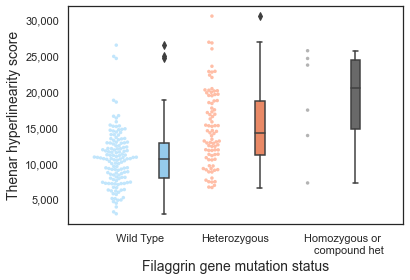

In [94]:
"""
T0.02 - figure
"""

a = age1
ylab = 'Thenar hyperlinearity score'

ya="thenar_scores"
result01 = "***"
result12 = "***"
result02 = "***"

plotbox(a=a, xa="FLG status_x", ya=ya, ylabel=ylab, alpha=0.5, s=3.5)
#plotbox2(a=a, xa="FLG status", ya=ya, ylabel=ylab, alpha=0.5, s=3.5, altlabel=True)
ymax = a[ya].max()
"""

addstats(result01, result12, result02, ymax)
#plt.title('Thenar dataset')

#####add in scores from other images
x1, x2 = -1, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
h = 2
col = 'k'

y = 12214
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)

y = 11855
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)

y = 20479
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)


sns.despine()
plt.show()
"""






"\n\naddstats(result01, result12, result02, ymax)\n#plt.title('Thenar dataset')\n\n#####add in scores from other images\nx1, x2 = -1, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())\nh = 2\ncol = 'k'\n\ny = 12214\nplt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)\nplt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)\n\ny = 11855\nplt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)\nplt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)\n\ny = 20479\nplt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)\nplt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)\n\n\nsns.despine()\nplt.show()\n"

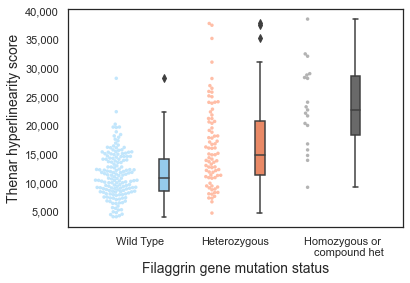

In [95]:
"""
T0.02 - figure
"""

a = age2
ylab = 'Thenar hyperlinearity score'

ya="thenar_scores"
result01 = "***"
result12 = "***"
result02 = "***"

plotbox(a=a, xa="FLG status_x", ya=ya, ylabel=ylab, alpha=0.5, s=3.5)
#plotbox2(a=a, xa="FLG status", ya=ya, ylabel=ylab, alpha=0.5, s=3.5, altlabel=True)
ymax = a[ya].max()
"""

addstats(result01, result12, result02, ymax)
#plt.title('Thenar dataset')

#####add in scores from other images
x1, x2 = -1, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
h = 2
col = 'k'

y = 12214
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)

y = 11855
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)

y = 20479
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.2, c=col)
plt.text((x1+x2)*.5, y+h, result01, ha='center', va='bottom', color=col)


sns.despine()
plt.show()
"""







In [350]:
"""
Calculate flow diagram
"""

'\nCalculate flow diagram\n'

In [352]:
mcv4.head(1)

,study_id,study_id_y,clinical_hyperlinearity,palmar_scores,FLG status_x,thenar_scores,new_id_y,enrol,lasttopical,ThenarScore,...,h_allergyqual___1,h_allergyqual___99,emoll,body_limbs,bath,shower,o3270,pm25120,flg_binary,clin_hyper_new2
0,3,3,0,11985,1,8294,3,2018-05-18,-,11985.0,...,0,1,1.0,11.0,2.0,2.0,2.498685e+09,1.471017e+09,1,1


In [354]:
mcv4['FLG status_x'].value_counts()

0    324
1    179
2     28
Name: FLG status_x, dtype: int64

In [374]:
wildtype = mcv4[mcv4['FLG status_x'] == 0]
heterozygous = mcv4[mcv4['FLG status_x'] == 1]
homozygous = mcv4[mcv4['FLG status_x'] == 2]

In [376]:
wildtype['clinical_hyperlinearity'].value_counts()

1    256
2     46
0     17
3      5
Name: clinical_hyperlinearity, dtype: int64

In [377]:
heterozygous['clinical_hyperlinearity'].value_counts()

2    79
1    55
3    42
0     3
Name: clinical_hyperlinearity, dtype: int64

In [378]:
homozygous['clinical_hyperlinearity'].value_counts()

3    19
2     8
1     1
Name: clinical_hyperlinearity, dtype: int64

In [379]:
mcv4.to_csv("mcv4.csv")

In [156]:
t_scores = mcv4['thenar_scores']

In [161]:
t_scores_sorted = t_scores.sort_values(ascending=False, ignore_index=True)

In [163]:
t_scores_sorted[53]

20684

'\nClinical characteristics by FLG group\n'

47

In [34]:
"""
Clinical characteristics by FLG group + hyperlinearity
"""

0.0    129
1.0     47
Name: h_hayfeverdr, dtype: int64

In [78]:
mcv4.head()

In [83]:
thenarscoredb = ['low_ts', 'mod_ts', 'high_ts']
contvariables = [ 'age', 'easi', 'igelevel']
catcariables = ['sex',   'h_allergydr', 'h_asthmadr', 'h_hayfeverdr']

low_ts = mcv4[mcv4['thenar_scores'] < 10000]
mod_ts = mcv4[(mcv4['thenar_scores'] >= 10000) & (mcv4['thenar_scores'] <=20000)]
high_ts = mcv4[mcv4['thenar_scores']  > 20000]

 

age
count    178.000000
mean       9.885899
std        6.003910
min        0.200000
25%        4.850000
50%        9.600000
75%       13.975000
max       29.600000
Name: age, dtype: float64
easi
count    178.000000
mean       6.193989
std        8.059325
min        0.000000
25%        1.000000
50%        3.250000
75%        8.775000
max       53.450000
Name: easi, dtype: float64
igelevel
count        46.000000
mean       6768.652174
std       14638.767590
min           7.000000
25%        2230.000000
50%        3674.000000
75%        5938.250000
max      100000.000000
Name: igelevel, dtype: float64
sex
n=86 / 178, % = 48.31460674157304
h_allergydr
n=74 / 177, % = 41.80790960451977
h_asthmadr
n=41 / 177, % = 23.163841807909606
h_hayfeverdr
n=47 / 176, % = 26.704545454545453


In [82]:
"""
low_ts
"""
for y in contvariables:
    print(y)
    print(low_ts[y].describe())
    
for y in catcariables:
    print(y)
    numerator = low_ts[y].value_counts().values[1]
    intermediate = low_ts[y].value_counts().values[0]
    denominator = numerator+intermediate
    print(f"n={numerator} / {denominator}, % = {(numerator/denominator)*100}")

age
count    290.000000
mean      10.699069
std        6.742764
min        0.500000
25%        5.525000
50%        9.700000
75%       15.200000
max       30.900000
Name: age, dtype: float64
easi
count    290.000000
mean       8.367000
std        9.035908
min        0.000000
25%        1.800000
50%        5.150000
75%       11.662500
max       51.000000
Name: easi, dtype: float64
igelevel
count       88.000000
mean      6074.011364
std       7589.494617
min          5.000000
25%        733.000000
50%       2912.000000
75%       9337.250000
max      35447.000000
Name: igelevel, dtype: float64
sex
n=123 / 289, % = 42.56055363321799
h_allergydr
n=130 / 290, % = 44.827586206896555
h_asthmadr
n=73 / 290, % = 25.17241379310345
h_hayfeverdr
n=88 / 290, % = 30.344827586206897


In [70]:
"""
mod_ts
"""


for y in contvariables:
    print(y)
    print(mod_ts[y].describe())


for y in catcariables:
    print(y)
    numerator = mod_ts[y].value_counts().values[1]
    intermediate = mod_ts[y].value_counts().values[0]
    denominator = numerator+intermediate
    print(f"n={numerator} / {denominator}, % = {(numerator/denominator)*100}")

sex
n=123 / 289, % = 42.56055363321799
h_asthmadr
n=73 / 290, % = 25.17241379310345
h_allergydr
n=130 / 290, % = 44.827586206896555
h_hayfeverdr
n=88 / 290, % = 30.344827586206897


In [81]:
"""
high_ts
"""

for y in contvariables:
    print(y)
    print(high_ts[y].describe())

for y in catcariables:
    print(y)
    numerator = high_ts[y].value_counts().values[1]
    intermediate = high_ts[y].value_counts().values[0]
    denominator = numerator+intermediate
    print(f"n={numerator} / {denominator}, % = {(numerator/denominator)*100}")



age
count    63.000000
mean     12.414444
std       7.116490
min       0.300000
25%       6.550000
50%      11.400000
75%      16.700000
max      28.900000
Name: age, dtype: float64
easi
count    63.000000
mean     13.211429
std      12.218070
min       0.000000
25%       4.025000
50%       7.600000
75%      18.300000
max      50.100000
Name: easi, dtype: float64
igelevel
count       19.000000
mean      8483.210526
std       8359.450876
min        126.000000
25%       1392.000000
50%       3733.000000
75%      15377.500000
max      26646.000000
Name: igelevel, dtype: float64
sex
n=22 / 63, % = 34.92063492063492
h_allergydr
n=28 / 63, % = 44.44444444444444
h_asthmadr
n=20 / 63, % = 31.746031746031743
h_hayfeverdr
n=30 / 63, % = 47.61904761904761


sex
n=22 / 63, % = 34.92063492063492
h_asthmadr
n=20 / 63, % = 31.746031746031743
h_allergydr
n=28 / 63, % = 44.44444444444444
h_hayfeverdr
n=30 / 63, % = 47.61904761904761


In [73]:
"""
baseline by flg status
"""

'\nbaseline by flg status\n'

In [76]:
wt_db = mcv4[mcv4['FLG status_x'] == 0]
het_db = mcv4[(mcv4['FLG status_x'] == 1)]
ho_db = mcv4[mcv4['FLG status_x'] == 2]

In [77]:
"""
WT
"""
for y in contvariables:
    print(y)
    print(wt_db[y].describe())

for y in catcariables:
    print(y)
    numerator = wt_db[y].value_counts().values[1]
    intermediate = wt_db[y].value_counts().values[0]
    denominator = numerator+intermediate
    print(f"n={numerator} / {denominator}, % = {(numerator/denominator)*100}")


age
count    324.000000
mean      10.789660
std        6.617381
min        0.200000
25%        5.700000
50%       10.200000
75%       15.200000
max       30.700000
Name: age, dtype: float64
easi
count    324.000000
mean       7.414537
std        8.793917
min        0.000000
25%        1.400000
50%        4.200000
75%        9.975000
max       53.450000
Name: easi, dtype: float64
igelevel
count        84.000000
mean       6424.678571
std       11953.883267
min           7.000000
25%        1215.000000
50%        2968.500000
75%        7351.000000
max      100000.000000
Name: igelevel, dtype: float64
sex
n=137 / 324, % = 42.28395061728395
h_asthmadr
n=77 / 323, % = 23.8390092879257
h_allergydr
n=132 / 323, % = 40.86687306501548
h_hayfeverdr
n=96 / 322, % = 29.81366459627329


In [79]:
"""
het_db
"""
for y in contvariables:
    print(y)
    print(het_db[y].describe())

for y in catcariables:
    print(y)
    numerator = het_db[y].value_counts().values[1]
    intermediate = het_db[y].value_counts().values[0]
    denominator = numerator+intermediate
    print(f"n={numerator} / {denominator}, % = {(numerator/denominator)*100}")



age
count    179.000000
mean      10.052291
std        6.165431
min        0.500000
25%        5.100000
50%        9.400000
75%       14.400000
max       25.500000
Name: age, dtype: float64
easi
count    179.000000
mean       8.930447
std        9.842664
min        0.000000
25%        2.475000
50%        5.400000
75%       11.400000
max       50.100000
Name: easi, dtype: float64
igelevel
count       57.000000
mean      6900.315789
std       8136.546181
min          5.000000
25%       1187.000000
50%       3498.000000
75%       9310.000000
max      35447.000000
Name: igelevel, dtype: float64
sex
n=79 / 178, % = 44.38202247191011
h_allergydr
n=85 / 179, % = 47.486033519553075
h_asthmadr
n=44 / 179, % = 24.581005586592177
h_hayfeverdr
n=58 / 179, % = 32.402234636871505


In [80]:
"""
ho_db
"""
for y in contvariables:
    print(y)
    print(ho_db[y].describe())

for y in catcariables:
    print(y)
    numerator = ho_db[y].value_counts().values[1]
    intermediate = ho_db[y].value_counts().values[0]
    denominator = numerator+intermediate
    print(f"n={numerator} / {denominator}, % = {(numerator/denominator)*100}")




age
count    28.000000
mean     12.475714
std       8.358745
min       0.300000
25%       6.675000
50%      11.900000
75%      14.825000
max      30.900000
Name: age, dtype: float64
easi
count    28.000000
mean     12.872143
std      11.426682
min       0.700000
25%       3.625000
50%       7.350000
75%      20.125000
max      40.820000
Name: easi, dtype: float64
igelevel
count       12.000000
mean      6171.750000
std       6235.572761
min        126.000000
25%        508.000000
50%       4037.500000
75%      10489.250000
max      16123.000000
Name: igelevel, dtype: float64
sex
n=13 / 28, % = 46.42857142857143
h_allergydr
n=13 / 28, % = 46.42857142857143
h_asthmadr
n=13 / 28, % = 46.42857142857143
h_hayfeverdr
n=11 / 28, % = 39.285714285714285


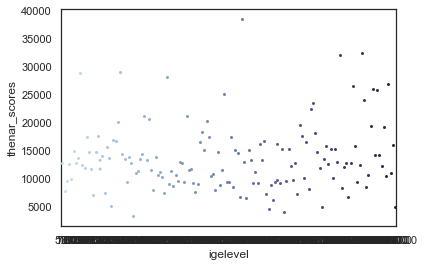

In [136]:

"""
thenar_scores = list(mcv4['thenar_scores'])
palmar_scores = list(mcv4['palmar_scores'])
age = list(mcv4['age'])

globallabels = mcv4['flg_binary']

sex = list(mcv4['sex'])
easi = list(mcv4['easi'])
asthma = list(mcv4['h_asthmadr'])
allergy = list(mcv4['h_allergydr'])
hayfever = list(mcv4['h_hayfeverdr'])
igelevel = list(mcv4['igelevel'])
"""

xa="igelevel"
ya="thenar_scores"
ylabel = "Thenar hyperlineartiy score"
a=mcv4
#plotbox(a=a, xa=xa, ya=ya, ylabel=ylab, alpha=0.5, s=3.5)
#colours = ['lightskyblue','coral', 'dimgrey', 'red']
colours="ch:s=.25,rot=-.25"
#colours="dark:#5A9"
ax = sns.swarmplot(x=xa, y=ya, data=mcv4, alpha=1, s=3, 
                    palette=colours)